In [1]:
print("Lecture-19")

Lecture-19


### Keras Modelinde Parçalı Verilerle Çalışmak

Yüksek miktarda verilerle eğitimler yapılırken verilerin hepsinin önce bellekte oluşturulması sonra eğitim işleminde kapasite sorunlarına yol açabilmektedir. Traning_dataset_x, training_dataset_y --> eğer bu veriler bellee sıpmayacak ölçüde büyükse ne olacaktır?

Keras'ta çok büyük miktarda verilerle eğitim ve test işlemleri yapılırken eğitim ve test verileri tek parça olarak değil de parça parça da oluşturulabilmektedir. Eğitim ve test verilerinin parçalar halinde oluşturulması "üretici fonksiyonlar (generators)" yoluyla ya da Sequence nesneleri yoluyla yapılmaktadır. fit_generator

In [ ]:
EPOCHS = 100
STEPS_PER_EPOCH = 16
BATCH_SIZE = 32

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def data_generator():
    for _ in range(EPOCHS):
        for _ in range(STEPS_PER_EPOCH):
            training_dataset_x = np.random.rand(BATCH_SIZE, 10)
            training_dataset_y = np.random.randint(0, 2, BATCH_SIZE)
            yield training_dataset_x, training_dataset_y # bir fonksiyonu generator olarak tanımlamak için kullanılır. ÖDEV: Generator?

model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu', name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='softmax', name='Output'))

model.compile('rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(data_generator(), epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH)

Epoch 1/100
16/16 [==============================] - 4s 6ms/step - loss: 0.6935 - binary_accuracy: 0.5156
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6953 - binary_accuracy: 0.5000
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6918 - binary_accuracy: 0.5469
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6951 - binary_accuracy: 0.5293
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6955 - binary_accuracy: 0.4805
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6969 - binary_accuracy: 0.4980
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6974 - binary_accuracy: 0.4961
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6955 - binary_accuracy: 0.4805
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6909 - binary_accuracy: 0.4609
Epoch 10/100
16/16 [==========================

Eğitim sırasında her epoch'tan sonra sınama işlemine sokulacak sınama verileri de fit metodunun validation_data parametresi yoluyla parçalı bir biçimde oluşturulabilmektedir. Eğer validation_data parametresi bir üretici fonksiyon biçiminde girilirse fit metodu ilk epoch bittiğinde bu üretici fonksiyon yoluyla sınama verilerini elde eder ve sınama işlemlerinfe bu verileri kullanır. validation_steps

In [3]:
EPOCHS = 100
STEPS_PER_EPOCH = 16
BATCH_SIZE = 32
VALIDATION_STEPS = 5

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def data_generator():
    for _ in range(EPOCHS):
        for _ in range(STEPS_PER_EPOCH):
            training_dataset_x = np.random.rand(BATCH_SIZE, 10)
            training_dataset_y = np.random.randint(0, 2, BATCH_SIZE)
            yield training_dataset_x, training_dataset_y 

def validation_generator():
    for _ in range(EPOCHS):
        for _ in range(VALIDATION_STEPS):
            x = np.random.rand(BATCH_SIZE, 10)
            y = np.random.randint(0, 2,  BATCH_SIZE, dtype='int8')

            yield x, y

model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu', name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='softmax', name='Output'))

model.compile('rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(data_generator(), epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH, validation_data=validation_generator(), validation_steps=VALIDATION_STEPS)


Epoch 1/100
16/16 [==============================] - 2s 60ms/step - loss: 0.7017 - binary_accuracy: 0.4902 - val_loss: 0.6870 - val_binary_accuracy: 0.5125
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6935 - binary_accuracy: 0.5098 - val_loss: 0.6932 - val_binary_accuracy: 0.6187
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6967 - binary_accuracy: 0.5098 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6961 - binary_accuracy: 0.4922 - val_loss: 0.6955 - val_binary_accuracy: 0.4875
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6973 - binary_accuracy: 0.5039 - val_loss: 0.6946 - val_binary_accuracy: 0.5250
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6985 - binary_accuracy: 0.4863 - val_loss: 0.6979 - val_binary_accuracy: 0.5000
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - lo

In [4]:
EPOCHS = 100
STEPS_PER_EPOCH = 16
BATCH_SIZE = 32
VALIDATION_STEPS = 5
TEST_STEPS = 10

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def data_generator():
    for _ in range(EPOCHS):
        for _ in range(STEPS_PER_EPOCH):
            training_dataset_x = np.random.rand(BATCH_SIZE, 10)
            training_dataset_y = np.random.randint(0, 2, BATCH_SIZE)
            yield training_dataset_x, training_dataset_y 

def validation_generator():
    for _ in range(EPOCHS):
        for _ in range(VALIDATION_STEPS):
            x = np.random.rand(BATCH_SIZE, 10)
            y = np.random.randint(0, 2,  BATCH_SIZE, dtype='int8')

            yield x, y

def test_generator():
    for _ in range(TEST_STEPS):
        x = np.random.rand(BATCH_SIZE, 10)
        y = np.random.randint(0, 2, BATCH_SIZE, dtype='int8')

        yield x, y

model = Sequential(name='PartialDataTraining')
model.add(Dense(64, input_dim=10, activation='relu', name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='softmax', name='Output'))

model.compile('rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(data_generator(), epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH, validation_data=validation_generator(), validation_steps=VALIDATION_STEPS)

eval_result = model.evaluate(test_generator(), steps=TEST_STEPS)
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

Epoch 1/100
16/16 [==============================] - 1s 22ms/step - loss: 0.6996 - binary_accuracy: 0.5000 - val_loss: 0.6942 - val_binary_accuracy: 0.4625
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6923 - binary_accuracy: 0.4961 - val_loss: 0.6955 - val_binary_accuracy: 0.5250
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6929 - binary_accuracy: 0.5332 - val_loss: 0.6994 - val_binary_accuracy: 0.5063
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6949 - binary_accuracy: 0.4863 - val_loss: 0.6983 - val_binary_accuracy: 0.4812
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6971 - binary_accuracy: 0.4941 - val_loss: 0.6943 - val_binary_accuracy: 0.4750
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6925 - binary_accuracy: 0.5293 - val_loss: 0.6889 - val_binary_accuracy: 0.5562
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - lo

Model: "IMDB"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                6521344   
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 6,525,569
Trainable params: 6,525,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1000/1000 [==============================] - 83s 83ms/step - loss: 0.3228 - binary_accuracy: 0.8702 - val_loss: 0.2669 - val_binary_accuracy: 0.8989
Epoch 2/5
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2038 - binary_accuracy: 0.9235 - val_loss: 0.2790 - val_binary_accuracy: 0.897

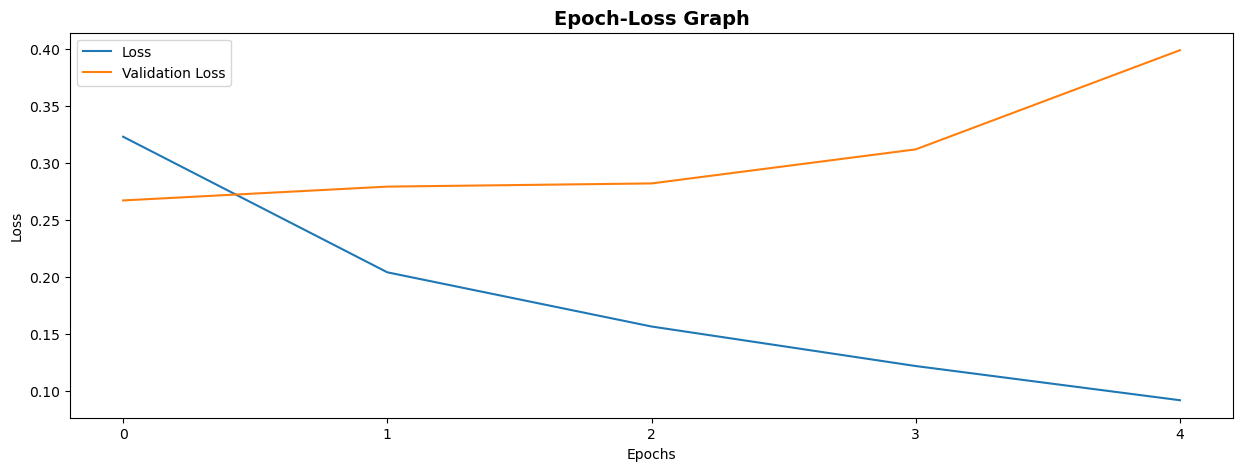

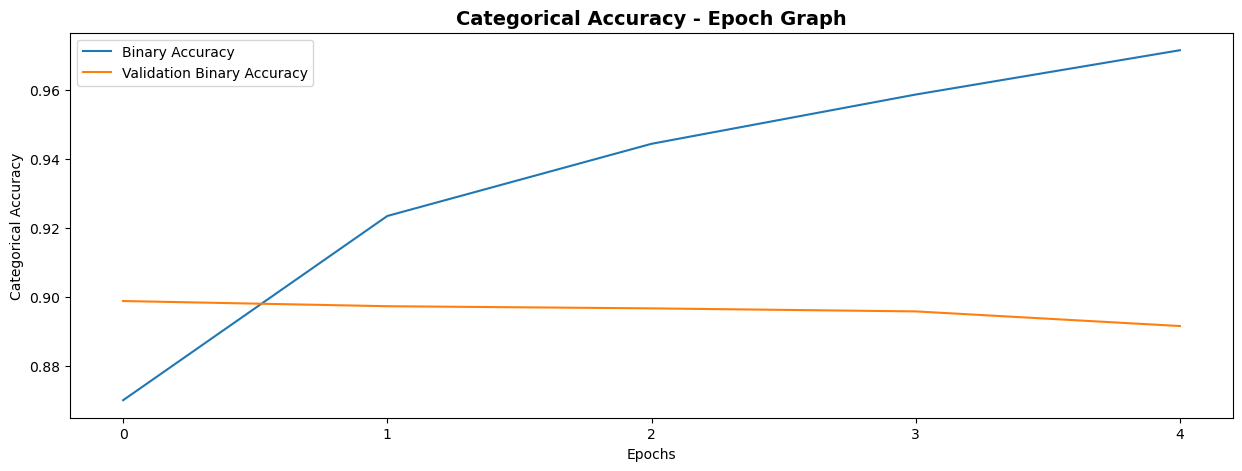

312/312 [==============================] - 11s 35ms/step - loss: 0.3589 - binary_accuracy: 0.8997
loss: 0.35889360308647156
binary_accuracy: 0.8997395634651184


In [5]:
EPOCHS = 5
BATCH_SIZE = 32

import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(dtype='int8')
cv.fit(df['review'])

df_x = df['review']
df_y = df['sentiment']

import numpy as np

dataset_y = np.zeros(len(df_y), dtype='int8')
dataset_y[df['sentiment'] == 'positive'] = 1

from sklearn.model_selection import train_test_split

temp_df_x, test_df_x, temp_y, test_y = train_test_split(df_x, dataset_y, test_size = 0.20)
training_df_x, validation_df_x, training_y, validation_y = train_test_split(temp_df_x, temp_y, test_size = 0.20)

def data_generator(data_df_x, data_y, epochs, steps, shuffle = True):
    indexes = list(range(steps))
    for _ in range(epochs):
        if shuffle:
            np.random.shuffle(indexes)
        for i in range(steps):
            start_index = indexes[i] * BATCH_SIZE
            stop_index = (indexes[i] + 1) * BATCH_SIZE

            x = cv.transform(data_df_x.iloc[start_index:stop_index]).todense()
            y = data_y[start_index:stop_index]

            yield x, y

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='IMDB')
model.add(Dense(64, input_dim=len(cv.vocabulary_), activation='relu', name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

steps_per_epochs = len(training_df_x) // BATCH_SIZE
steps_per_validation = len(validation_df_x) // BATCH_SIZE
steps_per_test = len(test_df_x) // BATCH_SIZE

hist = model.fit(data_generator(training_df_x, training_y, EPOCHS, steps_per_epochs), steps_per_epoch=steps_per_epochs, 
                 validation_data=data_generator(validation_df_x, validation_y, EPOCHS, steps_per_validation, False),
                 validation_steps = steps_per_validation, epochs= EPOCHS)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(hist.epoch)
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Categorical Accuracy - Epoch Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.xticks(hist.epoch)
plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

eval_result = model.evaluate(data_generator(test_df_x, test_y, 1, steps_per_test), steps=steps_per_test)

for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

Keras'ta parçalı işlemler sınıflar yoluyla da yapılabilmektedir. Bunun için tensorflow.keras.utils.Sequence sınıfından bir sınıf türetilerek sınıf için ___len___ ve ___getitem___ metotları yazılır. ___len___ metodu bir epoch'un kaç batch işleminden oluşaacağını belirlemek amacıyla kullanılmaktadır. Bir epoch ___len___ metodundna döndürülen sayıda batch işleminden oluşturulmaktadır. ___getitem___ metodu ise her batch işleminde fit metodu tarafından çağrılır. ___getitem___ metodunun bir index parametresi bulunmaktadır. Bu index parametresi epoch içerisindeki kaçıncı batch verilerinni elde edileceğini belirtmektedir. Biz programcı olarak ___getitem___ metodundan batch işleminde kullanılacak parçalı x ve y değerlerinden oluşan bir demet geri döndürmelidir. Sınıf için on_epoch_end metodu da yazılabilir. Bu metot her epoch bittiğinde çağrılmaktadır.  